In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
words = open("/Users/sasha/Documents/makemore/data/names.txt", "r").read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
chars = sorted(list(set("".join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

In [5]:
block_size = 3
X, Y = [], []
for word in words[:5]:
    print(word)
    context = [0] * block_size
    for char in word + ".":
        ix = stoi[char]
        X.append(context)
        Y.append(ix)
        print("".join(itos[i] for i in context), "--->", itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [6]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [7]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [8]:
C = torch.randn((27, 2))

In [9]:
C[5]

tensor([ 0.9324, -1.0787])

In [10]:
C[X]

tensor([[[ 0.5677, -0.0332],
         [ 0.5677, -0.0332],
         [ 0.5677, -0.0332]],

        [[ 0.5677, -0.0332],
         [ 0.5677, -0.0332],
         [ 0.9324, -1.0787]],

        [[ 0.5677, -0.0332],
         [ 0.9324, -1.0787],
         [ 1.5647,  0.0980]],

        [[ 0.9324, -1.0787],
         [ 1.5647,  0.0980],
         [ 1.5647,  0.0980]],

        [[ 1.5647,  0.0980],
         [ 1.5647,  0.0980],
         [-0.4120, -1.0908]],

        [[ 0.5677, -0.0332],
         [ 0.5677, -0.0332],
         [ 0.5677, -0.0332]],

        [[ 0.5677, -0.0332],
         [ 0.5677, -0.0332],
         [ 0.1950, -0.6946]],

        [[ 0.5677, -0.0332],
         [ 0.1950, -0.6946],
         [ 0.3892, -0.0819]],

        [[ 0.1950, -0.6946],
         [ 0.3892, -0.0819],
         [ 0.1406,  0.6051]],

        [[ 0.3892, -0.0819],
         [ 0.1406,  0.6051],
         [ 0.9943, -0.0437]],

        [[ 0.1406,  0.6051],
         [ 0.9943, -0.0437],
         [ 0.1406,  0.6051]],

        [[ 0.9943, -0

In [11]:
X[13, 2]

tensor(1)

In [12]:
C[X][13, 2]

tensor([-0.4120, -1.0908])

In [13]:
C[1]

tensor([-0.4120, -1.0908])

In [14]:
emb = C[X]
emb

tensor([[[ 0.5677, -0.0332],
         [ 0.5677, -0.0332],
         [ 0.5677, -0.0332]],

        [[ 0.5677, -0.0332],
         [ 0.5677, -0.0332],
         [ 0.9324, -1.0787]],

        [[ 0.5677, -0.0332],
         [ 0.9324, -1.0787],
         [ 1.5647,  0.0980]],

        [[ 0.9324, -1.0787],
         [ 1.5647,  0.0980],
         [ 1.5647,  0.0980]],

        [[ 1.5647,  0.0980],
         [ 1.5647,  0.0980],
         [-0.4120, -1.0908]],

        [[ 0.5677, -0.0332],
         [ 0.5677, -0.0332],
         [ 0.5677, -0.0332]],

        [[ 0.5677, -0.0332],
         [ 0.5677, -0.0332],
         [ 0.1950, -0.6946]],

        [[ 0.5677, -0.0332],
         [ 0.1950, -0.6946],
         [ 0.3892, -0.0819]],

        [[ 0.1950, -0.6946],
         [ 0.3892, -0.0819],
         [ 0.1406,  0.6051]],

        [[ 0.3892, -0.0819],
         [ 0.1406,  0.6051],
         [ 0.9943, -0.0437]],

        [[ 0.1406,  0.6051],
         [ 0.9943, -0.0437],
         [ 0.1406,  0.6051]],

        [[ 0.9943, -0

In [15]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [16]:
emb[:, 0, :]

tensor([[ 0.5677, -0.0332],
        [ 0.5677, -0.0332],
        [ 0.5677, -0.0332],
        [ 0.9324, -1.0787],
        [ 1.5647,  0.0980],
        [ 0.5677, -0.0332],
        [ 0.5677, -0.0332],
        [ 0.5677, -0.0332],
        [ 0.1950, -0.6946],
        [ 0.3892, -0.0819],
        [ 0.1406,  0.6051],
        [ 0.9943, -0.0437],
        [ 0.5677, -0.0332],
        [ 0.5677, -0.0332],
        [ 0.5677, -0.0332],
        [-0.4120, -1.0908],
        [ 0.5677, -0.0332],
        [ 0.5677, -0.0332],
        [ 0.5677, -0.0332],
        [ 0.1406,  0.6051],
        [-1.3003,  0.1359],
        [-0.4120, -1.0908],
        [-0.8574, -0.7097],
        [ 0.9324, -1.0787],
        [ 0.3892, -0.0819],
        [ 0.5677, -0.0332],
        [ 0.5677, -0.0332],
        [ 0.5677, -0.0332],
        [-1.3003,  0.1359],
        [ 0.1950, -0.6946],
        [ 0.1515,  0.2224],
        [-0.2016, -0.2057]])

In [17]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[ 0.5677, -0.0332,  0.5677, -0.0332,  0.5677, -0.0332],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.9324, -1.0787],
        [ 0.5677, -0.0332,  0.9324, -1.0787,  1.5647,  0.0980],
        [ 0.9324, -1.0787,  1.5647,  0.0980,  1.5647,  0.0980],
        [ 1.5647,  0.0980,  1.5647,  0.0980, -0.4120, -1.0908],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.5677, -0.0332],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.1950, -0.6946],
        [ 0.5677, -0.0332,  0.1950, -0.6946,  0.3892, -0.0819],
        [ 0.1950, -0.6946,  0.3892, -0.0819,  0.1406,  0.6051],
        [ 0.3892, -0.0819,  0.1406,  0.6051,  0.9943, -0.0437],
        [ 0.1406,  0.6051,  0.9943, -0.0437,  0.1406,  0.6051],
        [ 0.9943, -0.0437,  0.1406,  0.6051, -0.4120, -1.0908],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.5677, -0.0332],
        [ 0.5677, -0.0332,  0.5677, -0.0332, -0.4120, -1.0908],
        [ 0.5677, -0.0332, -0.4120, -1.0908,  0.9943, -0.0437],
        [-0.4120, -1.0908,  0.9943, -0.0

In [18]:
torch.cat(torch.unbind(emb, 1), 1)

tensor([[ 0.5677, -0.0332,  0.5677, -0.0332,  0.5677, -0.0332],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.9324, -1.0787],
        [ 0.5677, -0.0332,  0.9324, -1.0787,  1.5647,  0.0980],
        [ 0.9324, -1.0787,  1.5647,  0.0980,  1.5647,  0.0980],
        [ 1.5647,  0.0980,  1.5647,  0.0980, -0.4120, -1.0908],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.5677, -0.0332],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.1950, -0.6946],
        [ 0.5677, -0.0332,  0.1950, -0.6946,  0.3892, -0.0819],
        [ 0.1950, -0.6946,  0.3892, -0.0819,  0.1406,  0.6051],
        [ 0.3892, -0.0819,  0.1406,  0.6051,  0.9943, -0.0437],
        [ 0.1406,  0.6051,  0.9943, -0.0437,  0.1406,  0.6051],
        [ 0.9943, -0.0437,  0.1406,  0.6051, -0.4120, -1.0908],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.5677, -0.0332],
        [ 0.5677, -0.0332,  0.5677, -0.0332, -0.4120, -1.0908],
        [ 0.5677, -0.0332, -0.4120, -1.0908,  0.9943, -0.0437],
        [-0.4120, -1.0908,  0.9943, -0.0

In [19]:
emb.view(32, 6)

tensor([[ 0.5677, -0.0332,  0.5677, -0.0332,  0.5677, -0.0332],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.9324, -1.0787],
        [ 0.5677, -0.0332,  0.9324, -1.0787,  1.5647,  0.0980],
        [ 0.9324, -1.0787,  1.5647,  0.0980,  1.5647,  0.0980],
        [ 1.5647,  0.0980,  1.5647,  0.0980, -0.4120, -1.0908],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.5677, -0.0332],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.1950, -0.6946],
        [ 0.5677, -0.0332,  0.1950, -0.6946,  0.3892, -0.0819],
        [ 0.1950, -0.6946,  0.3892, -0.0819,  0.1406,  0.6051],
        [ 0.3892, -0.0819,  0.1406,  0.6051,  0.9943, -0.0437],
        [ 0.1406,  0.6051,  0.9943, -0.0437,  0.1406,  0.6051],
        [ 0.9943, -0.0437,  0.1406,  0.6051, -0.4120, -1.0908],
        [ 0.5677, -0.0332,  0.5677, -0.0332,  0.5677, -0.0332],
        [ 0.5677, -0.0332,  0.5677, -0.0332, -0.4120, -1.0908],
        [ 0.5677, -0.0332, -0.4120, -1.0908,  0.9943, -0.0437],
        [-0.4120, -1.0908,  0.9943, -0.0

In [20]:
h = emb.view(emb.shape[0], 6) @ W1 + b1

In [21]:
h

tensor([[-0.0810, -0.3144,  0.5987,  ...,  1.0394, -1.4220,  3.4849],
        [-0.1917, -0.2241,  0.4752,  ...,  1.9236, -1.3366,  5.8238],
        [-3.4447, -1.8149,  1.2293,  ...,  1.5887, -3.2273,  6.4418],
        ...,
        [ 1.3716,  0.6603, -1.2144,  ...,  1.2597,  0.3906,  1.2383],
        [ 0.7785, -0.5274,  0.5237,  ..., -0.2528, -1.6080,  0.2587],
        [ 3.3993,  0.8625, -0.0901,  ...,  0.6459,  0.1661,  1.6981]])

In [22]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)

In [23]:
h

tensor([[-0.0808, -0.3045,  0.5362,  ...,  0.7776, -0.8900,  0.9981],
        [-0.1894, -0.2204,  0.4424,  ...,  0.9582, -0.8709,  1.0000],
        [-0.9980, -0.9483,  0.8424,  ...,  0.9200, -0.9969,  1.0000],
        ...,
        [ 0.8791,  0.5786, -0.8380,  ...,  0.8510,  0.3719,  0.8450],
        [ 0.6519, -0.4834,  0.4806,  ..., -0.2475, -0.9229,  0.2531],
        [ 0.9978,  0.6976, -0.0898,  ...,  0.5689,  0.1646,  0.9352]])

In [24]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [25]:
logits = h @ W2 + b2

In [26]:
logits.shape

torch.Size([32, 27])

In [27]:
counts = logits.exp()

In [28]:
prob = counts / counts.sum(1, keepdim=True)

In [29]:
prob.shape

torch.Size([32, 27])

In [30]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [31]:
prob[torch.arange(32), Y]

tensor([1.9540e-09, 1.6842e-07, 1.7544e-06, 6.1438e-05, 4.6935e-20, 1.4603e-10,
        3.7075e-04, 3.8932e-09, 2.4467e-09, 1.2551e-09, 5.0500e-10, 4.8625e-15,
        7.7892e-07, 4.7007e-06, 1.9454e-08, 1.9800e-14, 5.8361e-09, 8.0817e-09,
        7.7926e-13, 2.9145e-09, 3.1495e-07, 9.6268e-15, 1.5712e-07, 8.9729e-04,
        1.1945e-13, 1.4473e-04, 5.5826e-04, 1.9998e-05, 5.8674e-05, 3.9744e-10,
        1.8258e-07, 8.8683e-08])

In [32]:
loss = -prob[torch.arange(32), Y].log().mean()

In [33]:
loss

tensor(18.7016)

In [34]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [35]:
sum(p.nelement() for p in parameters)

3481

In [36]:
for p in parameters:
    p.requires_grad = True

In [37]:
for i in range(1000):
    emb = C[X]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

0.2561309337615967


In [38]:
logits.max(1)

torch.return_types.max(
values=tensor([13.3346, 17.7913, 20.6013, 20.6105, 16.7355, 13.3346, 15.9994, 14.1734,
        15.9162, 18.3613, 15.9405, 20.9265, 13.3346, 17.1083, 17.1318, 20.0593,
        13.3346, 16.5877, 15.1016, 17.0572, 18.5875, 15.9678, 10.8739, 10.6879,
        15.5056, 13.3346, 16.1789, 16.9745, 12.7430, 16.2000, 19.0857, 16.0187],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [39]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [40]:
block_size = 3
X, Y = [], []
for word in words:
    context = [0] * block_size
    for char in word + ".":
        ix = stoi[char]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [41]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [42]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [43]:
sum(p.nelement() for p in parameters)

3481

In [44]:
for p in parameters:
    p.requires_grad = True

In [45]:
for i in range(20):
    emb = C[X]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad

19.505229949951172
17.084487915039062
15.776531219482422
14.833338737487793
14.002596855163574
13.253255844116211
12.579915046691895
11.983098983764648
11.470492362976074
11.05185604095459
10.709586143493652
10.407632827758789
10.127808570861816
9.86436653137207
9.614505767822266
9.37644100189209
9.148946762084961
8.931112289428711
8.722232818603516
8.52175235748291


In [46]:
torch.randint(0, X.shape[0], (32,))

tensor([ 39873, 134784, 120481,   6750, 180496, 145928, 132132, 175393, 206154,
        150553, 222317, 221556,   4853,  46989, 106879, 139650, 104958, 190691,
        144061,  54087,  17984, 119435,  23243,  60890, 157726,  98218,  17404,
         94026, 203790,  63269,  46300,  68646])

In [47]:
for i in range(100):
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad

8.966824531555176
8.683565139770508
7.338087558746338
7.2432990074157715
8.134991645812988
6.926597595214844
8.674720764160156
7.172987937927246
8.619664192199707
6.723089218139648
8.219948768615723
6.372987747192383
8.519357681274414
6.528956413269043
7.69659423828125
6.568014621734619
5.881806373596191
4.987475395202637
6.6102471351623535
5.405550479888916
6.082287311553955
5.56449556350708
4.114925861358643
5.7248406410217285
5.07465124130249
5.702683925628662
5.349152565002441
4.750551223754883
5.668773651123047
5.761432647705078
5.590900897979736
4.642505168914795
5.113226890563965
5.698171615600586
4.163814544677734
5.183121204376221
4.201549053192139
4.202724456787109
4.0813093185424805
5.656925678253174
4.243046760559082
4.90587854385376
3.4374449253082275
3.546924114227295
3.9177746772766113
4.747623920440674
4.3763508796691895
3.863428831100464
4.352351188659668
4.0045485496521
4.6111907958984375
3.727658748626709
3.4089066982269287
3.5377535820007324
3.5662882328033447
3.848

In [48]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(3.5679, grad_fn=<NllLossBackward0>)

In [49]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [50]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters)
for p in parameters:
    p.requires_grad = True
lri = []
lossi = [] 
for i in range(1000):
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
    lri.append(lre[i])
    lossi.append(loss.item())

20.04874038696289
19.7974796295166
16.196434020996094
20.293195724487305
16.873533248901367
18.44769287109375
18.506526947021484
21.252803802490234
18.217439651489258
18.233718872070312
19.60962677001953
22.233253479003906
19.091859817504883
19.828454971313477
20.519296646118164
16.92538833618164
21.11223602294922
18.10735511779785
20.00130271911621
20.287639617919922
18.910594940185547
17.317607879638672
18.633216857910156
18.707300186157227
19.496177673339844
17.851892471313477
19.32411003112793
18.917098999023438
16.99639892578125
17.144502639770508
19.065900802612305
17.58120346069336
14.65198802947998
17.28091812133789
16.564098358154297
18.23702049255371
16.774486541748047
18.974876403808594
19.973011016845703
18.061925888061523
19.640588760375977
19.26746940612793
16.651016235351562
20.245956420898438
18.523483276367188
16.164878845214844
18.603893280029297
14.918516159057617
20.70323371887207
16.269317626953125
15.84041976928711
15.60209846496582
18.701711654663086
17.281150817

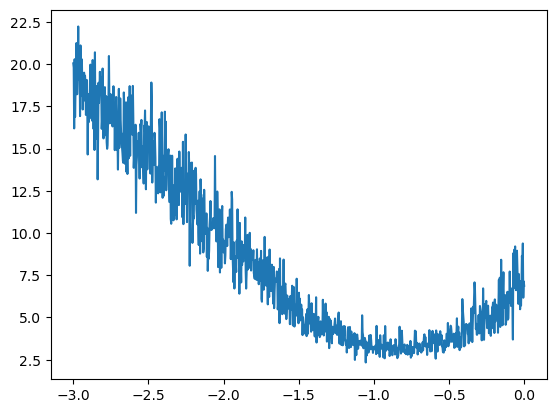

In [51]:
plt.plot(lri, lossi)
plt.show()

In [52]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters)
for p in parameters:
    p.requires_grad = True
for i in range(100000):
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 10**-1
    for p in parameters:
        p.data += -lr * p.grad

In [53]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3436, grad_fn=<NllLossBackward0>)

In [54]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for word in words:
        context = [0] * block_size
        for char in word + ".":
            ix = stoi[char]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [55]:
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [56]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [57]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [58]:
sum(p.nelement() for p in parameters)

3481

In [59]:
for p in parameters:
    p.requires_grad = True

In [60]:
for i in range(100000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 10**-1
    for p in parameters:
        p.data += -lr * p.grad
print(loss.item())

2.1827340126037598


In [61]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3351, grad_fn=<NllLossBackward0>)

In [62]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3270, grad_fn=<NllLossBackward0>)

In [63]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [64]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [65]:
sum(p.nelement() for p in parameters)

10281

In [66]:
for p in parameters:
    p.requires_grad = True

In [67]:
lri = []
lossi = [] 
stepi = []
for i in range(30000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    lossi.append(loss.item())

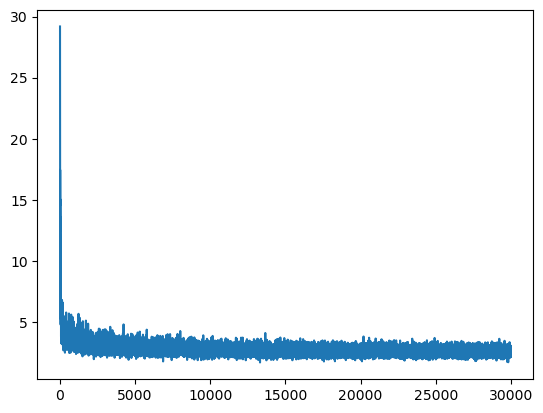

In [68]:
plt.plot(stepi, lossi)
plt.show()

In [69]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.4628, grad_fn=<NllLossBackward0>)

In [70]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4658, grad_fn=<NllLossBackward0>)

In [71]:
lri = []
lossi = [] 
stepi = []
for i in range(30000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    lossi.append(loss.item())

In [72]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.4429, grad_fn=<NllLossBackward0>)

In [73]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4476, grad_fn=<NllLossBackward0>)

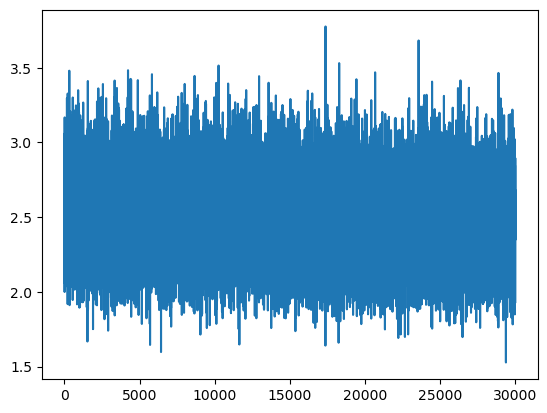

In [74]:
plt.plot(stepi, lossi)
plt.show()

In [75]:
lri = []
lossi = [] 
stepi = []
for i in range(50000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    lossi.append(loss.item())

In [76]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3643, grad_fn=<NllLossBackward0>)

In [77]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3754, grad_fn=<NllLossBackward0>)

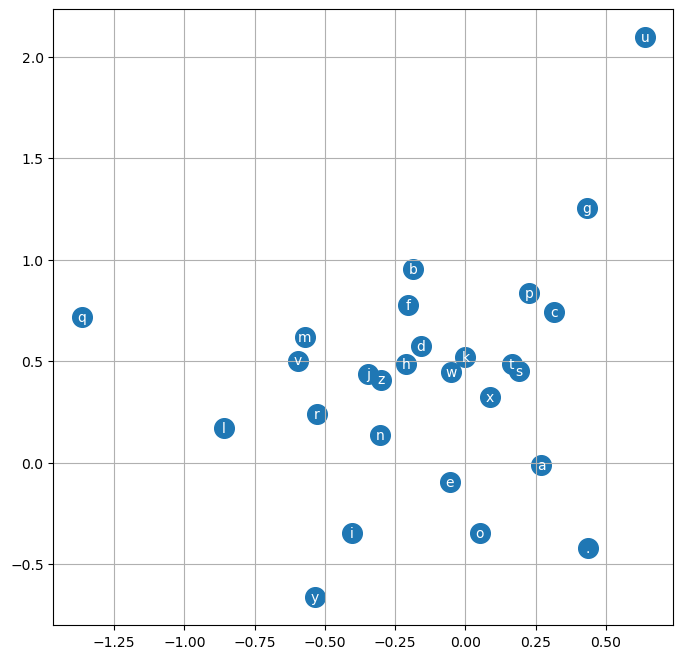

In [78]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")
plt.show()

In [79]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [80]:
sum(p.nelement() for p in parameters)

11897

In [81]:
for p in parameters:
    p.requires_grad = True

In [82]:
lri = []
lossi = [] 
stepi = []

In [83]:
for i in range(50000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())

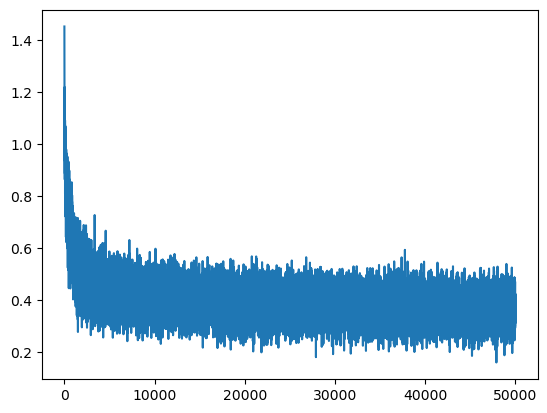

In [84]:
plt.plot(stepi, lossi)
plt.show()

In [85]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3677, grad_fn=<NllLossBackward0>)

In [86]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4034, grad_fn=<NllLossBackward0>)

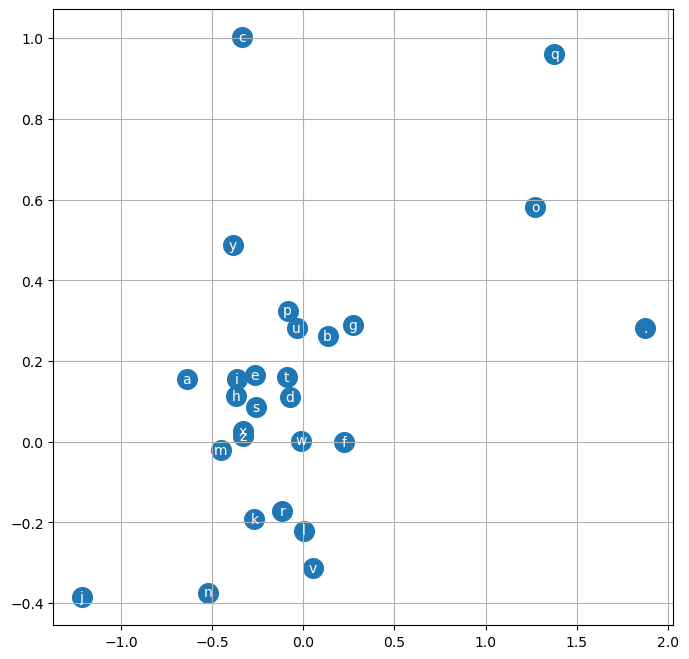

In [87]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")
plt.show()

In [88]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [89]:
sum(p.nelement() for p in parameters)

11897

In [90]:
for p in parameters:
    p.requires_grad = True

In [91]:
lri = []
lossi = [] 
stepi = []

In [92]:
for i in range(200000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())

In [93]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1364, grad_fn=<NllLossBackward0>)

In [94]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1770, grad_fn=<NllLossBackward0>)

In [95]:
g = torch.Generator().manual_seed(2147483647 + 10)
for i in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print("".join(itos[i] for i in out))

carpah.
amille.
khyrgh.
zheity.
skaanslee.
zhutnayverynci.
aquil.
ramara.
chaiiv.
kaleigh.
ham.
join.
quint.
shoja.
alivia.
arrothoniearysia.
kael.
druli.
edde.
iia.


In [96]:
words = open("/Users/sasha/Documents/makemore/data/names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [97]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [98]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     
Xdev, Ydev = build_dataset(words[n1:n2])   
Xte,  Yte  = build_dataset(words[n2:]) 

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [99]:
n_embd = 10 
n_hidden = 200 
g = torch.Generator().manual_seed(2147483647) 
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5) 
b1 = torch.randn(n_hidden,                        generator=g) 
W2 = torch.randn((n_hidden, vocab_size),          generator=g)
b2 = torch.randn(vocab_size,                      generator=g)
parameters = [C, W1, W2, b2]
print(sum(p.nelement() for p in parameters)) 
for p in parameters:
    p.requires_grad = True

11697


In [100]:
with torch.no_grad():
    emb = C[Xtr]                      
    embcat = emb.view(emb.shape[0], -1)  
    hpreact = embcat @ W1        
    bnmean = hpreact.mean(dim=0, keepdim=True)  
    bnstd  = hpreact.std(dim=0, keepdim=True)   

In [101]:
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] 
    emb = C[Xb] 
    embcat = emb.view(emb.shape[0], -1) 
    hpreact = embcat @ W1 + b1 
    h = torch.tanh(hpreact) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Yb) 
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01 
    for p in parameters:
        if p.grad is not None:
            p.data += -lr * p.grad
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

      0/ 200000: 24.2073
  10000/ 200000: 2.4548
  20000/ 200000: 2.3042
  30000/ 200000: 2.6951
  40000/ 200000: 1.9447
  50000/ 200000: 2.5411
  60000/ 200000: 2.5524
  70000/ 200000: 2.1059
  80000/ 200000: 2.4153
  90000/ 200000: 2.1696
 100000/ 200000: 1.9938
 110000/ 200000: 2.2895
 120000/ 200000: 1.9013
 130000/ 200000: 2.4841
 140000/ 200000: 2.3590
 150000/ 200000: 2.1821
 160000/ 200000: 1.9023
 170000/ 200000: 1.8276
 180000/ 200000: 2.0687
 190000/ 200000: 1.8009


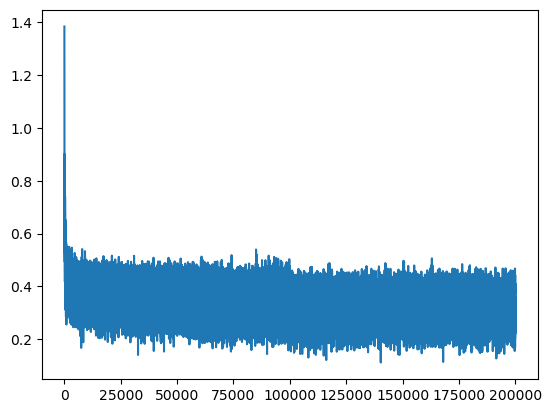

In [102]:
plt.plot(lossi)
plt.show()

In [103]:
logits = torch.tensor([0.0, 0.0, 0.0, 0.0])
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
probs, loss

(tensor([0.2500, 0.2500, 0.2500, 0.2500]), tensor(1.3863))

In [104]:
logits = torch.tensor([0.0, 0.0, 5.0, 0.0])
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
probs, loss

(tensor([0.0066, 0.0066, 0.9802, 0.0066]), tensor(0.0200))

In [105]:
logits = torch.tensor([0.0, 5.0, 0.0, 0.0])
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
probs, loss

(tensor([0.0066, 0.9802, 0.0066, 0.0066]), tensor(5.0200))

In [106]:
-torch.tensor(1/27.0).log()

tensor(3.2958)

In [107]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     
Xdev, Ydev = build_dataset(words[n1:n2])   
Xte,  Yte  = build_dataset(words[n2:]) 
n_embd = 10 
n_hidden = 200 
g = torch.Generator().manual_seed(2147483647) 
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) 
b1 = torch.randn(n_hidden,                        generator=g) 
W2 = torch.randn((n_hidden, vocab_size),          generator=g)
b2 = torch.randn(vocab_size,                      generator=g)
parameters = [C, W1, W2, b2]
print(sum(p.nelement() for p in parameters)) 
for p in parameters:
    p.requires_grad = True

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])
11697


In [108]:
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] 
    emb = C[Xb] 
    embcat = emb.view(emb.shape[0], -1) 
    hpreact = embcat @ W1 + b1 
    h = torch.tanh(hpreact) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Yb)
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01 
    for p in parameters:
        if p.grad is not None:
            p.data += -lr * p.grad
    if i % 10000 == 0: 
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    break

      0/ 200000: 26.5404


In [109]:
logits[0]

tensor([  9.8054, -10.7094, -18.9225,   4.5784,  25.0958,  12.3420,  25.2245,
          2.3172,  23.1374, -15.8994,  -1.2803, -13.0714,  11.7869,  21.8830,
        -10.2817, -10.7709,  13.7777,  -7.2771,  -1.5731,  15.3102,  -0.5203,
        -18.8392,  30.8516,  16.5554, -18.1451,   2.9022, -36.2960],
       grad_fn=<SelectBackward0>)

In [110]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     
Xdev, Ydev = build_dataset(words[n1:n2])   
Xte,  Yte  = build_dataset(words[n2:]) 
n_embd = 10 
n_hidden = 200 
g = torch.Generator().manual_seed(2147483647) 
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden,                        generator=g) 
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0
parameters = [C, W1, W2, b2]
print(sum(p.nelement() for p in parameters)) 
for p in parameters:
    p.requires_grad = True

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])
11697


In [111]:
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] 
    emb = C[Xb] 
    embcat = emb.view(emb.shape[0], -1) 
    hpreact = embcat @ W1 + b1 
    h = torch.tanh(hpreact) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Yb) 
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        if p.grad is not None:
            p.data += -lr * p.grad
    if i % 10000 == 0: 
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    break

      0/ 200000: 3.2999


In [112]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     
Xdev, Ydev = build_dataset(words[n1:n2])   
Xte,  Yte  = build_dataset(words[n2:]) 
n_embd = 10 
n_hidden = 200 
g = torch.Generator().manual_seed(2147483647) 
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g)
b1 = torch.randn(n_hidden,                        generator=g) 
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0
parameters = [C, W1, W2, b2]
print(sum(p.nelement() for p in parameters)) 
for p in parameters:
    p.requires_grad = True
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix]
    emb = C[Xb] 
    embcat = emb.view(emb.shape[0], -1) 
    hpreact = embcat @ W1 + b1 
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Yb)
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01 
    for p in parameters:
        if p.grad is not None:
            p.data += -lr * p.grad
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

torch.Size([182441, 3]) torch.Size([182441])
torch.Size([22902, 3]) torch.Size([22902])
torch.Size([22803, 3]) torch.Size([22803])
11697
      0/ 200000: 3.2757
  10000/ 200000: 2.5853
  20000/ 200000: 2.3328
  30000/ 200000: 2.0362
  40000/ 200000: 2.1804
  50000/ 200000: 2.0146
  60000/ 200000: 1.9760
  70000/ 200000: 2.2040
  80000/ 200000: 2.2110
  90000/ 200000: 2.0347
 100000/ 200000: 1.9188
 110000/ 200000: 1.8606
 120000/ 200000: 2.0631
 130000/ 200000: 2.0455
 140000/ 200000: 1.7254
 150000/ 200000: 2.2054
 160000/ 200000: 1.6789
 170000/ 200000: 1.8981
 180000/ 200000: 2.1589
 190000/ 200000: 1.8312


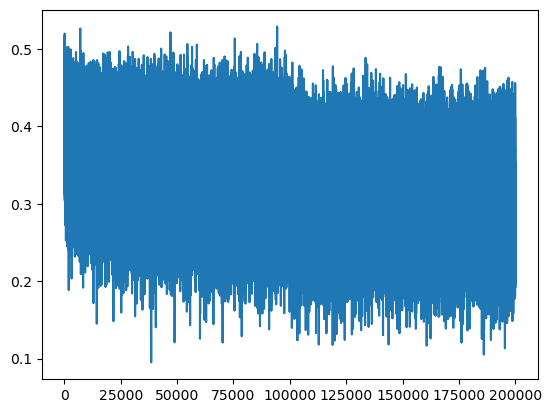

In [113]:
plt.plot(lossi)
plt.show()

In [114]:
h

tensor([[-1.0000, -0.7672,  0.9880,  ..., -0.0780,  0.9998,  1.0000],
        [-0.9226, -0.9984, -0.9944,  ..., -0.9163, -0.9999,  1.0000],
        [-1.0000, -1.0000, -1.0000,  ...,  0.9852,  0.9968,  1.0000],
        ...,
        [-0.9671, -1.0000, -0.9993,  ..., -1.0000, -0.8419, -0.8318],
        [-1.0000, -0.9966, -1.0000,  ...,  0.9980, -0.9997, -1.0000],
        [ 0.9994, -0.9995,  0.9996,  ...,  0.9896, -1.0000,  0.9996]],
       grad_fn=<TanhBackward0>)

In [115]:
h.shape

torch.Size([32, 200])

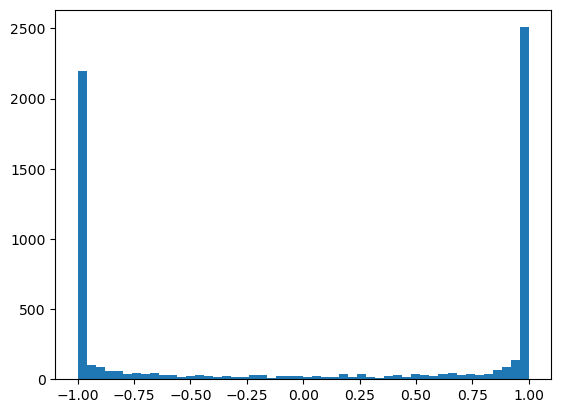

In [116]:
plt.hist(h.view(-1).tolist(), 50)
plt.show()

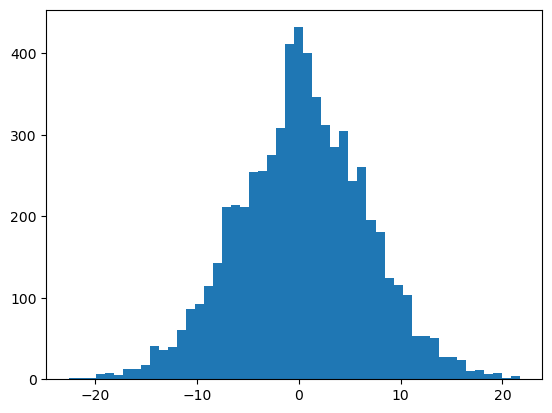

In [117]:
plt.hist(hpreact.view(-1).tolist(), 50)
plt.show()

In [118]:
plt.figure(figsize=(20, 10))
plt.imshow(h.abs() > 0.99, cmap="gray", interpolation="nearest")

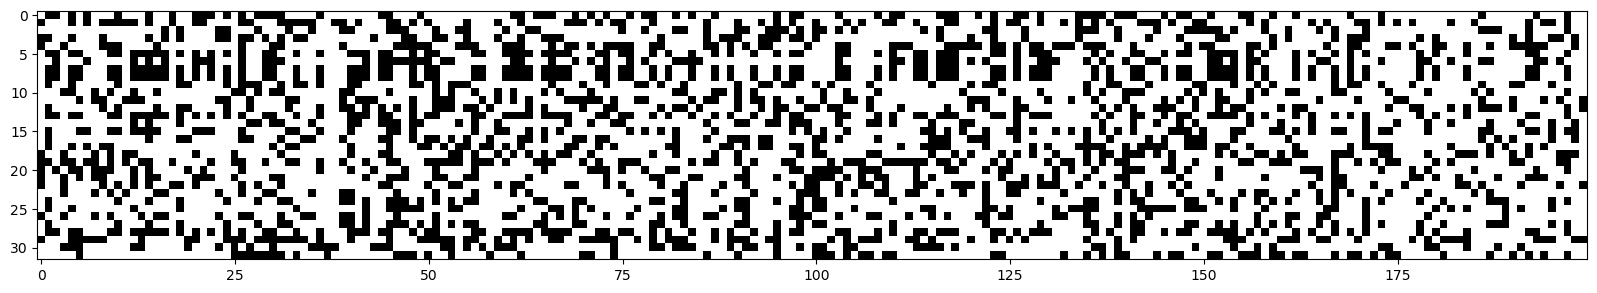

In [119]:
plt.show()

In [120]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     
Xdev, Ydev = build_dataset(words[n1:n2])   
Xte,  Yte  = build_dataset(words[n2:]) 
n_embd = 10 
n_hidden = 200 
g = torch.Generator().manual_seed(2147483647) 
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * 0.2
b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0
parameters = [C, W1, W2, b2]
print(sum(p.nelement() for p in parameters)) 
for p in parameters:
    p.requires_grad = True
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] 
    emb = C[Xb] 
    embcat = emb.view(emb.shape[0], -1) 
    hpreact = embcat @ W1 + b1 
    h = torch.tanh(hpreact) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Yb) 
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01 
    for p in parameters:
        if p.grad is not None:
            p.data += -lr * p.grad
    if i % 10000 == 0: 
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    break

torch.Size([182424, 3]) torch.Size([182424])
torch.Size([22836, 3]) torch.Size([22836])
torch.Size([22886, 3]) torch.Size([22886])
11697
      0/ 200000: 3.2962


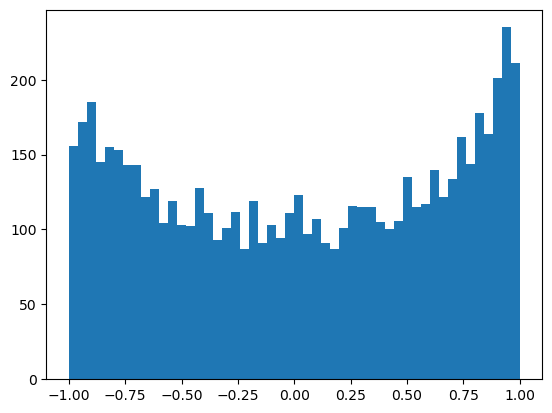

In [121]:
plt.hist(h.view(-1).tolist(), 50)
plt.show()

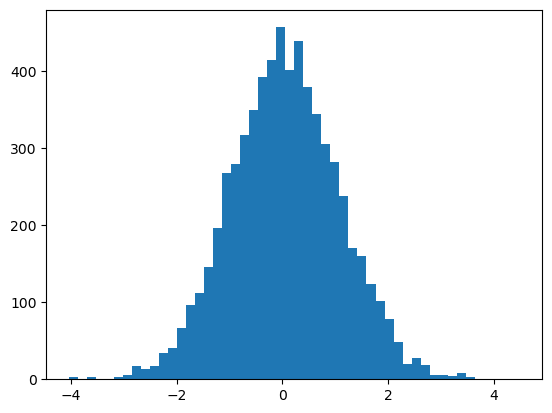

In [122]:
plt.hist(hpreact.view(-1).tolist(), 50)
plt.show()

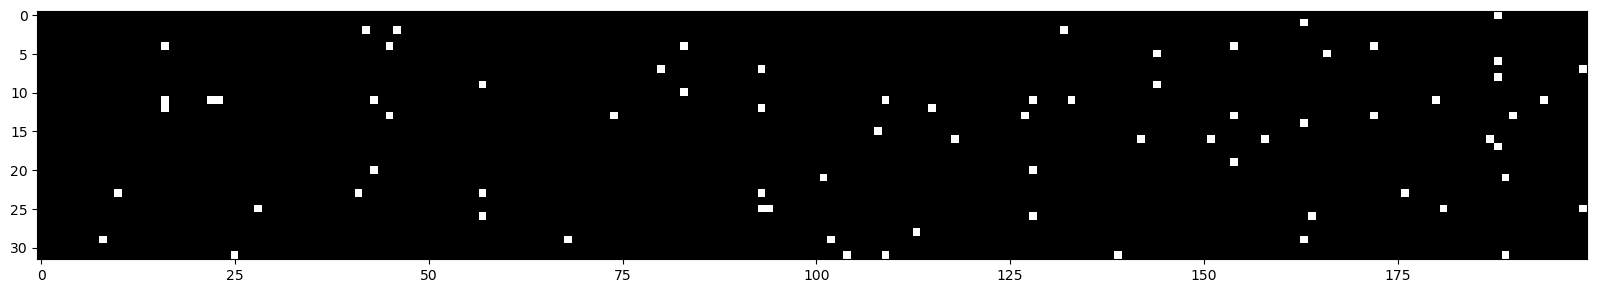

In [123]:
plt.figure(figsize=(20, 10))
plt.imshow(h.abs() > 0.99, cmap="gray", interpolation="nearest")
plt.show()

In [124]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     
Xdev, Ydev = build_dataset(words[n1:n2])   
Xte,  Yte  = build_dataset(words[n2:]) 
n_embd = 10 
n_hidden = 200 
g = torch.Generator().manual_seed(2147483647) 
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * 0.2
b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0
parameters = [C, W1, W2, b2]
print(sum(p.nelement() for p in parameters)) 
for p in parameters:
    p.requires_grad = True
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] 
    emb = C[Xb] 
    embcat = emb.view(emb.shape[0], -1) 
    hpreact = embcat @ W1 + b1 
    h = torch.tanh(hpreact) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Yb) 
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01 
    for p in parameters:
        if p.grad is not None:
            p.data += -lr * p.grad
    if i % 10000 == 0: 
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

torch.Size([182512, 3]) torch.Size([182512])
torch.Size([22860, 3]) torch.Size([22860])
torch.Size([22774, 3]) torch.Size([22774])
11697
      0/ 200000: 3.3292
  10000/ 200000: 2.1862
  20000/ 200000: 2.2149
  30000/ 200000: 1.9999
  40000/ 200000: 2.2662
  50000/ 200000: 1.9382
  60000/ 200000: 2.2092
  70000/ 200000: 1.9672
  80000/ 200000: 2.0055
  90000/ 200000: 1.8333
 100000/ 200000: 2.2850
 110000/ 200000: 1.9986
 120000/ 200000: 2.0328
 130000/ 200000: 2.2694
 140000/ 200000: 1.9607
 150000/ 200000: 2.0643
 160000/ 200000: 1.9605
 170000/ 200000: 2.0815
 180000/ 200000: 1.9646
 190000/ 200000: 1.9918


In [125]:
@torch.no_grad()
def split_loss(split):
    x, y = {
        'train': (Xtr, Ytr),
        'val':   (Xdev, Ydev),
        'test':  (Xte, Yte),
    }[split]
    emb = C[x]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1 + b1
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.0367820262908936
val 2.1022868156433105


In [126]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200)
y = x @ w
print(x.mean(), x.std())
print(y.mean(), y.std())

tensor(-0.0087) tensor(1.0019)
tensor(0.0014) tensor(3.1603)


In [127]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200) / 10**0.5
y = x @ w
print(x.mean(), x.std())
print(y.mean(), y.std())

tensor(-0.0014) tensor(1.0009)
tensor(0.0015) tensor(1.0035)


In [128]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     
Xdev, Ydev = build_dataset(words[n1:n2])   
Xte,  Yte  = build_dataset(words[n2:]) 
n_embd = 10 
n_hidden = 200 
g = torch.Generator().manual_seed(2147483647) 
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5)
b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0
parameters = [C, W1, W2, b2]
print(sum(p.nelement() for p in parameters)) 
for p in parameters:
    p.requires_grad = True
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix]
    emb = C[Xb] 
    embcat = emb.view(emb.shape[0], -1) 
    hpreact = embcat @ W1 + b1 
    h = torch.tanh(hpreact) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Yb) 
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01 
    for p in parameters:
        if p.grad is not None:
            p.data += -lr * p.grad
    if i % 10000 == 0: 
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

torch.Size([182484, 3]) torch.Size([182484])
torch.Size([22869, 3]) torch.Size([22869])
torch.Size([22793, 3]) torch.Size([22793])
11697
      0/ 200000: 3.2968
  10000/ 200000: 2.0540
  20000/ 200000: 2.5249
  30000/ 200000: 2.3402
  40000/ 200000: 2.0705
  50000/ 200000: 2.1979
  60000/ 200000: 2.1120
  70000/ 200000: 2.1485
  80000/ 200000: 2.3433
  90000/ 200000: 2.2209
 100000/ 200000: 2.0983
 110000/ 200000: 2.2155
 120000/ 200000: 1.5632
 130000/ 200000: 1.9109
 140000/ 200000: 1.8877
 150000/ 200000: 1.9985
 160000/ 200000: 2.0640
 170000/ 200000: 2.0634
 180000/ 200000: 2.0305
 190000/ 200000: 2.0437


In [129]:
@torch.no_grad()
def split_loss(split):
    x, y = {
        'train': (Xtr, Ytr),
        'val':   (Xdev, Ydev),
        'test':  (Xte, Yte),
    }[split]

    emb = C[x]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(split, loss.item())
split_loss('train')
split_loss('val')

train 2.037599563598633
val 2.109154224395752


In [130]:
hpreact.shape

torch.Size([32, 200])

In [131]:
hpreact.mean(0, keepdim=True)

tensor([[ 0.0819, -0.1265, -1.1909,  0.8628, -0.0914,  0.0729,  1.9320, -1.0930,
         -0.1071,  1.7790, -0.6564, -0.9493, -0.2907, -0.1819, -0.6161,  0.6981,
          0.4406, -1.1940,  0.0514,  1.0015,  0.1155, -0.3169, -0.3393, -0.1473,
          1.2825,  0.7143,  0.0582, -1.3693,  0.6140,  0.3363,  0.1037, -0.6108,
         -0.8608, -0.1564,  0.0974, -1.3257,  0.6622,  0.2013, -0.5952, -0.7991,
          0.3936, -0.2959, -0.0943,  0.4991, -0.2433, -0.7771,  0.4207,  0.8787,
          0.5337,  0.5402,  0.5230,  0.0719,  0.8479,  0.8259,  0.6581,  0.1429,
         -0.3811,  1.3602,  0.0313, -0.5195, -1.0869,  1.1301,  0.3430,  0.3101,
          0.8080,  0.7459,  0.0057,  0.0837, -0.5284,  0.7904, -1.0074,  0.4473,
          0.4554, -0.4790, -0.4853, -0.5832, -0.3578, -0.8909, -0.4721, -0.3838,
         -0.0959,  2.0181, -0.1845, -0.5812,  0.6364, -1.0255, -0.2993,  0.6867,
         -0.0197,  0.0163, -1.1154,  1.0907, -1.5380, -0.9837, -0.8571, -0.0102,
         -1.7466, -0.6324,  

In [132]:
hpreact.mean(0, keepdim=True).shape

torch.Size([1, 200])

In [133]:
hpreact.std(0, keepdim=True)

tensor([[2.5602, 2.6067, 2.3120, 2.6584, 2.1483, 2.3648, 1.9735, 2.2596, 2.6854,
         1.7378, 2.4360, 1.8648, 1.9297, 2.2215, 2.1055, 2.1256, 2.2507, 2.5221,
         2.3378, 2.8649, 2.5912, 2.1935, 2.0889, 2.4994, 1.6984, 2.0885, 1.8226,
         1.9607, 2.4892, 2.8787, 1.6111, 1.8935, 2.4289, 1.6397, 1.4274, 2.1966,
         2.1857, 2.1938, 1.5704, 2.3250, 1.7509, 2.0099, 2.8033, 2.1751, 2.2816,
         2.1120, 1.7188, 2.0170, 1.4284, 2.5650, 1.9602, 2.4809, 2.3744, 2.5918,
         2.8419, 1.6067, 1.7468, 2.0246, 2.4310, 2.3346, 1.7262, 2.5513, 1.8574,
         1.5705, 2.3164, 1.8891, 1.8560, 2.5384, 2.4193, 2.5858, 2.6635, 1.8183,
         1.4619, 1.9735, 1.7929, 1.9378, 2.0791, 2.6683, 2.0766, 2.5957, 2.3544,
         3.0250, 1.6578, 2.3234, 2.4673, 2.6921, 1.8268, 2.2454, 2.1662, 1.5640,
         2.1885, 2.0608, 1.5722, 2.7235, 1.8936, 1.7616, 2.9171, 1.2190, 1.9465,
         2.1656, 2.3709, 2.1503, 1.8772, 2.4344, 1.8889, 1.8601, 2.3112, 2.6109,
         1.9272, 2.0958, 2.4

In [134]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     
Xdev, Ydev = build_dataset(words[n1:n2])   
Xte,  Yte  = build_dataset(words[n2:]) 
n_embd = 10 
n_hidden = 200 
g = torch.Generator().manual_seed(2147483647) 
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5)
b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0
parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix]
    emb = C[Xb]                            
    embcat = emb.view(emb.shape[0], -1)     
    hpreact = embcat @ W1 + b1   
    h = torch.tanh(hpreact)                
    logits = h @ W2 + b2                     
    loss = F.cross_entropy(logits, Yb)
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data -= lr * p.grad
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())


torch.Size([182691, 3]) torch.Size([182691])
torch.Size([22793, 3]) torch.Size([22793])
torch.Size([22662, 3]) torch.Size([22662])
11897
      0/ 200000: 3.3052
  10000/ 200000: 1.9130
  20000/ 200000: 2.6073
  30000/ 200000: 1.7236
  40000/ 200000: 1.8056
  50000/ 200000: 1.9622
  60000/ 200000: 2.5324
  70000/ 200000: 1.9220
  80000/ 200000: 1.9933
  90000/ 200000: 1.8359
 100000/ 200000: 2.6347
 110000/ 200000: 2.1851
 120000/ 200000: 1.9988
 130000/ 200000: 1.9352
 140000/ 200000: 2.0455
 150000/ 200000: 2.2189
 160000/ 200000: 2.1781
 170000/ 200000: 2.0949
 180000/ 200000: 2.1681
 190000/ 200000: 2.3931


In [135]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     
Xdev, Ydev = build_dataset(words[n1:n2])   
Xte,  Yte  = build_dataset(words[n2:]) 
n_embd = 10 
n_hidden = 200 
g = torch.Generator().manual_seed(2147483647) 
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5)
b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0
bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))
parameters = [C, W1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters)) 
for p in parameters:
    p.requires_grad = True
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] 
    emb = C[Xb] 
    embcat = emb.view(emb.shape[0], -1) 
    hpreact = embcat @ W1 + b1 
    hpreact = bngain * (hpreact - hpreact.mean(0, keepdim=True)) / hpreact.std(0, keepdim=True) + bnbias
    h = torch.tanh(hpreact) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Yb) 
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01 
    for p in parameters:
        if p.grad is not None:
            p.data += -lr * p.grad
    if i % 10000 == 0: 
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22740, 3]) torch.Size([22740])
torch.Size([22826, 3]) torch.Size([22826])
12097
      0/ 200000: 3.3127
  10000/ 200000: 2.2414
  20000/ 200000: 1.9250
  30000/ 200000: 2.1478
  40000/ 200000: 1.6982
  50000/ 200000: 2.0259
  60000/ 200000: 2.1683
  70000/ 200000: 2.2535
  80000/ 200000: 2.2104
  90000/ 200000: 2.2891
 100000/ 200000: 1.8450
 110000/ 200000: 2.0577
 120000/ 200000: 2.2563
 130000/ 200000: 2.1712
 140000/ 200000: 2.4444
 150000/ 200000: 2.5237
 160000/ 200000: 2.1251
 170000/ 200000: 2.3011
 180000/ 200000: 2.3544
 190000/ 200000: 2.0050


In [136]:
with torch.no_grad():
    emb = C[Xtr]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1 + b1
    bnmean = hpreact.mean(dim=0, keepdim=True)
    bnstd = hpreact.std(dim=0, keepdim=True)

In [137]:
@torch.no_grad()
def split_loss(split):
    x, y = {
        'train': (Xtr, Ytr),
        'val':   (Xdev, Ydev),
        'test':  (Xte, Yte),
    }[split]

    emb = C[x]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1
    hpreact = bngain * (hpreact - hpreact.mean(dim=0, keepdim=True)) / hpreact.std(dim=0, keepdim=True) + bnbias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(split, loss.item())
split_loss('train')
split_loss('val')

train 2.0645086765289307
val 2.1214308738708496


In [138]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     
Xdev, Ydev = build_dataset(words[n1:n2])   
Xte,  Yte  = build_dataset(words[n2:]) 
n_embd = 10 
n_hidden = 200 
g = torch.Generator().manual_seed(2147483647) 
C  = torch.randn((vocab_size, n_embd),            generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5)
b1 = torch.randn(n_hidden,                        generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.01
b2 = torch.randn(vocab_size,                      generator=g) * 0
bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))
bnmean_running = torch.zeros((1, n_hidden))
bnstd_running = torch.ones((1, n_hidden))
parameters = [C, W1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters)) 
for p in parameters:
    p.requires_grad = True
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] 
    emb = C[Xb] 
    embcat = emb.view(emb.shape[0], -1) 
    hpreact = embcat @ W1 + b1 
    bnmeani = hpreact.mean(0, keepdim=True)
    bnstdi = hpreact.std(0, keepdim=True)
    hpreact = bngain * (hpreact - bnmeani) / bnstdi + bnbias
    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
        bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi
    h = torch.tanh(hpreact) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Yb) 
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01 
    for p in parameters:
        if p.grad is not None:
            p.data += -lr * p.grad
    if i % 10000 == 0: 
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

torch.Size([182400, 3]) torch.Size([182400])
torch.Size([22962, 3]) torch.Size([22962])
torch.Size([22784, 3]) torch.Size([22784])
12097
      0/ 200000: 3.3061
  10000/ 200000: 2.1770
  20000/ 200000: 2.2219
  30000/ 200000: 2.3880
  40000/ 200000: 2.4787
  50000/ 200000: 2.0671
  60000/ 200000: 2.2736
  70000/ 200000: 2.5753
  80000/ 200000: 2.3064
  90000/ 200000: 2.2943
 100000/ 200000: 1.9858
 110000/ 200000: 2.4411
 120000/ 200000: 2.3893
 130000/ 200000: 1.8824
 140000/ 200000: 2.2320
 150000/ 200000: 2.2451
 160000/ 200000: 1.9662
 170000/ 200000: 2.1870
 180000/ 200000: 2.3316
 190000/ 200000: 2.0401


In [139]:
with torch.no_grad():
    emb = C[Xtr]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1 + b1
    bnmean = hpreact.mean(0, keepdim=True)
    bnstd = hpreact.std(0, keepdim=True)

In [140]:
bnmean

tensor([[-2.1323,  0.8445, -1.3943,  1.2393,  0.9757,  0.5836,  3.0142, -1.5444,
          1.0446,  2.6202, -1.5847, -2.1279, -0.7816, -0.6306, -0.2803, -0.5925,
          0.7777, -1.8423, -0.6468, -0.3142,  0.8582, -0.5614,  0.1153,  1.0771,
          0.4060, -0.0063,  0.9864,  0.9820, -0.6410,  2.2927,  0.0410, -1.0585,
          0.6033,  0.1366, -0.2766, -0.7902,  0.7694, -0.2316, -1.0027,  0.0611,
          0.4001, -0.6674, -0.3886, -0.0375,  0.8098,  0.8687,  1.4106, -0.8105,
          2.3676,  1.2464,  1.1303,  0.5002,  2.0600,  0.6905,  2.0268, -2.1687,
         -0.3960,  0.4018,  1.0721, -0.6988, -1.1904,  0.8785,  0.3910, -0.3849,
          2.0421,  0.7872,  0.8703,  1.8108, -1.1326, -0.3915, -0.0527,  0.7247,
          1.0602, -1.7893, -3.2025,  0.2720,  0.9179, -0.7861,  0.5596,  0.6748,
         -0.3340,  1.6117,  1.0978,  1.0836, -0.0045,  0.0769, -1.3044,  0.3563,
          1.8642,  0.0709, -0.3986,  1.7158, -0.4259, -0.6881, -1.7966,  0.7717,
         -0.1590, -0.8503, -

In [141]:
bnmean_running

tensor([[-2.1432,  0.8545, -1.3979,  1.2567,  0.9777,  0.5830,  3.0227, -1.5406,
          1.0529,  2.6053, -1.5908, -2.1322, -0.8165, -0.6210, -0.2864, -0.5998,
          0.7792, -1.8423, -0.6574, -0.3041,  0.8495, -0.5544,  0.1197,  1.0735,
          0.4229, -0.0191,  0.9849,  1.0056, -0.6368,  2.2803,  0.0395, -1.0636,
          0.6103,  0.1353, -0.2640, -0.7943,  0.7788, -0.2241, -0.9935,  0.0552,
          0.3994, -0.6501, -0.3942, -0.0369,  0.8217,  0.8776,  1.4051, -0.8149,
          2.3660,  1.2262,  1.1358,  0.5167,  2.0522,  0.6825,  2.0188, -2.1686,
         -0.3812,  0.3976,  1.0707, -0.6964, -1.1922,  0.8881,  0.3928, -0.3860,
          2.0314,  0.7795,  0.8735,  1.8091, -1.1199, -0.4024, -0.0470,  0.7123,
          1.0575, -1.7845, -3.1918,  0.2779,  0.9231, -0.7797,  0.5764,  0.6803,
         -0.3444,  1.6124,  1.0916,  1.0728, -0.0043,  0.0774, -1.3168,  0.3446,
          1.8564,  0.0690, -0.3996,  1.7047, -0.4423, -0.6730, -1.7801,  0.7758,
         -0.1416, -0.8543, -

In [142]:
class Linear:
    def __init__(self, fan_in, fan_out, bias=True):
        self.weight = torch.randn((fan_in, fan_out), generator=g) / fan_in**0.5
        self.bias = torch.zeros(fan_out) if bias else None

    def __call__(self, x):
        self.out = x @ self.weight
        if self.bias is not None:
            self.out = self.out + self.bias
        return self.out

    def parameters(self):
        return [self.weight] + ([] if self.bias is None else [self.bias])

class BatchNorm1d:
    def __init__(self, dim, eps=1e-5, momentum=0.1):
        self.eps = eps
        self.momentum = momentum
        self.training = True
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)
        self.running_mean = torch.zeros(dim)
        self.running_var = torch.ones(dim)

    def __call__(self, x):
        if self.training:
            xmean = x.mean(0, keepdim=True)
            xvar = x.var(0, keepdim=True)
        else:
            xmean = self.running_mean
            xvar = self.running_var

        xhat = (x - xmean) / torch.sqrt(xvar + self.eps)
        self.out = self.gamma * xhat + self.beta

        if self.training:
            with torch.no_grad():
                self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
                self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar

        return self.out

    def parameters(self):
        return [self.gamma, self.beta]

class Tanh:
    def __call__(self, x):
        self.out = torch.tanh(x)
        return self.out

    def parameters(self):
        return []

n_embd = 10
n_hidden = 100
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size, n_embd), generator=g)
layers = [
    Linear(n_embd * block_size, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size, bias=False), BatchNorm1d(vocab_size),
]
with torch.no_grad():
    layers[-1].gamma *= 0.1
    for layer in layers[:-1]:
        if isinstance(layer, Linear):
            layer.weight *= 1.0
parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

47024


In [143]:
max_steps = 200000
batch_size = 32
lossi = []
ud = []
for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix]
    emb = C[Xb]
    x = emb.view(emb.shape[0], -1)
    for layer in layers:
        x = layer(x)
    loss = F.cross_entropy(x, Yb)
    for layer in layers:
        layer.out.retain_grad()
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 150000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    with torch.no_grad():
        ud.append([((lr * p.grad).std() / p.data.std()).log10().item() for p in parameters])

      0/ 200000: 3.2828
  10000/ 200000: 2.1955
  20000/ 200000: 2.1604
  30000/ 200000: 2.1361
  40000/ 200000: 2.1117
  50000/ 200000: 2.2179
  60000/ 200000: 2.2520
  70000/ 200000: 2.1774
  80000/ 200000: 1.8875
  90000/ 200000: 1.9402
 100000/ 200000: 1.8027
 110000/ 200000: 1.8969
 120000/ 200000: 2.4030
 130000/ 200000: 2.0526
 140000/ 200000: 2.1479
 150000/ 200000: 2.2600
 160000/ 200000: 2.2582
 170000/ 200000: 2.2733
 180000/ 200000: 2.0503
 190000/ 200000: 1.9037


layer 2 (      Tanh): mean +0.01, std 0.71, saturated: 17.88%
layer 5 (      Tanh): mean -0.02, std 0.75, saturated: 20.84%
layer 8 (      Tanh): mean -0.01, std 0.78, saturated: 22.16%
layer 11 (      Tanh): mean -0.01, std 0.79, saturated: 21.53%
layer 14 (      Tanh): mean -0.00, std 0.80, saturated: 24.56%


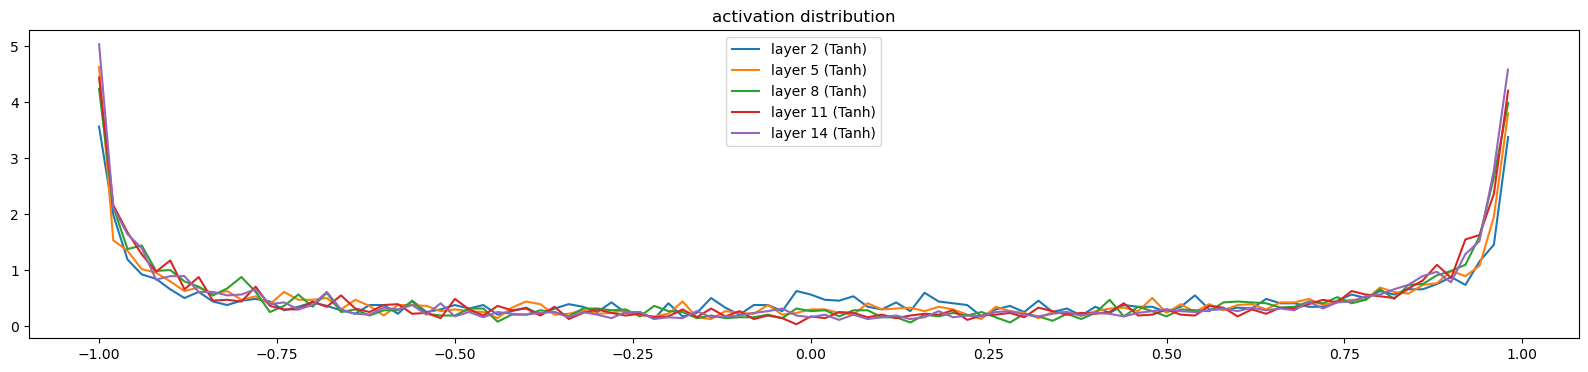

In [144]:
plt.figure(figsize=(20, 4))
legends = []
for i, layer in enumerate(layers[:-1]):
    if isinstance(layer, Tanh):
        t = layer.out
        print(
            'layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%'
            % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean() * 100)
        )
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__})')
plt.legend(legends)
plt.title('activation distribution')
plt.show()

layer 2 (      Tanh): mean +0.00, std 0.00, saturated: 0.00%
layer 5 (      Tanh): mean +0.00, std 0.00, saturated: 0.00%
layer 8 (      Tanh): mean +0.00, std 0.00, saturated: 0.00%
layer 11 (      Tanh): mean -0.00, std 0.00, saturated: 0.00%
layer 14 (      Tanh): mean +0.00, std 0.00, saturated: 0.00%


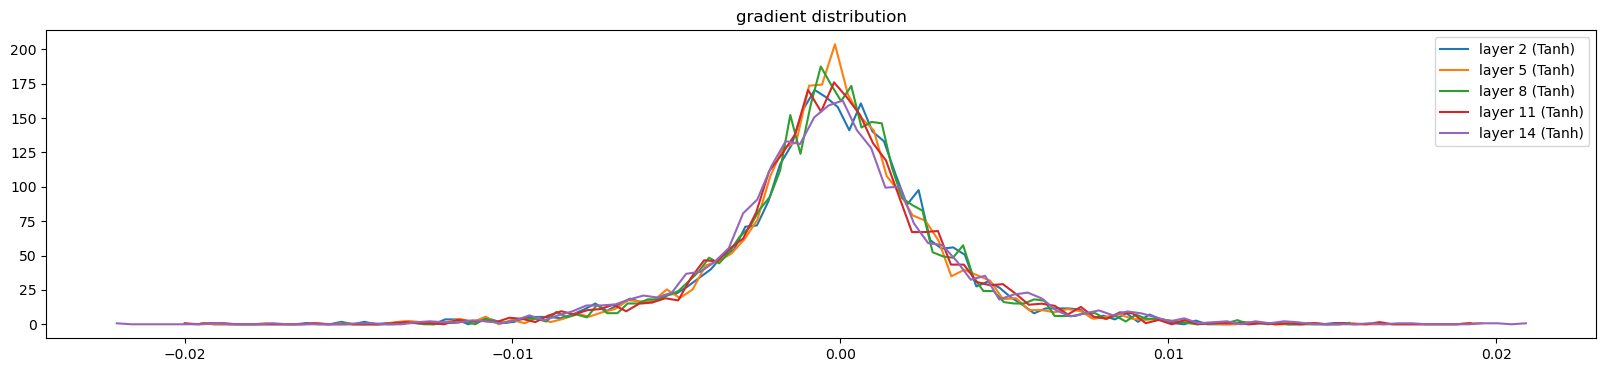

In [145]:
plt.figure(figsize=(20, 4))
legends = []
for i, layer in enumerate(layers[:-1]):
    if isinstance(layer, Tanh):
        t = layer.out.grad
        print(
            'layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%'
            % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean() * 100)
        )
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} ({layer.__class__.__name__})')
plt.legend(legends)
plt.title('gradient distribution')
plt.show()

weight   (27, 10) | mean -0.000000 | std 1.255061e-02 | grad:data ratio 1.106170e-02
weight  (30, 100) | mean +0.000165 | std 7.255837e-03 | grad:data ratio 1.803740e-02
weight (100, 100) | mean -0.000002 | std 4.631914e-03 | grad:data ratio 1.903536e-02
weight (100, 100) | mean -0.000011 | std 4.890216e-03 | grad:data ratio 2.048971e-02
weight (100, 100) | mean +0.000032 | std 4.873025e-03 | grad:data ratio 2.135392e-02
weight (100, 100) | mean +0.000005 | std 4.895880e-03 | grad:data ratio 2.265363e-02
weight  (100, 27) | mean +0.000076 | std 7.933482e-03 | grad:data ratio 2.274256e-02


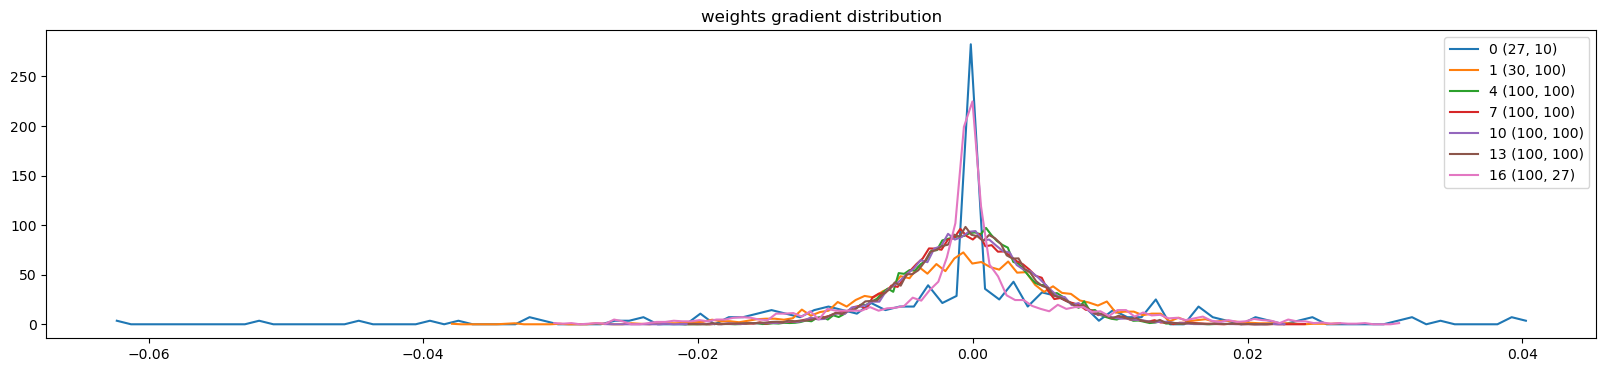

In [146]:
plt.figure(figsize=(20, 4))
legends = []
for i, p in enumerate(parameters):
    t = p.grad
    if p.ndim == 2:
        print(
            'weight %10s | mean %+f | std %e | grad:data ratio %e'
            % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std())
        )
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'{i} {tuple(p.shape)}')
plt.legend(legends)
plt.title('weights gradient distribution')
plt.show()

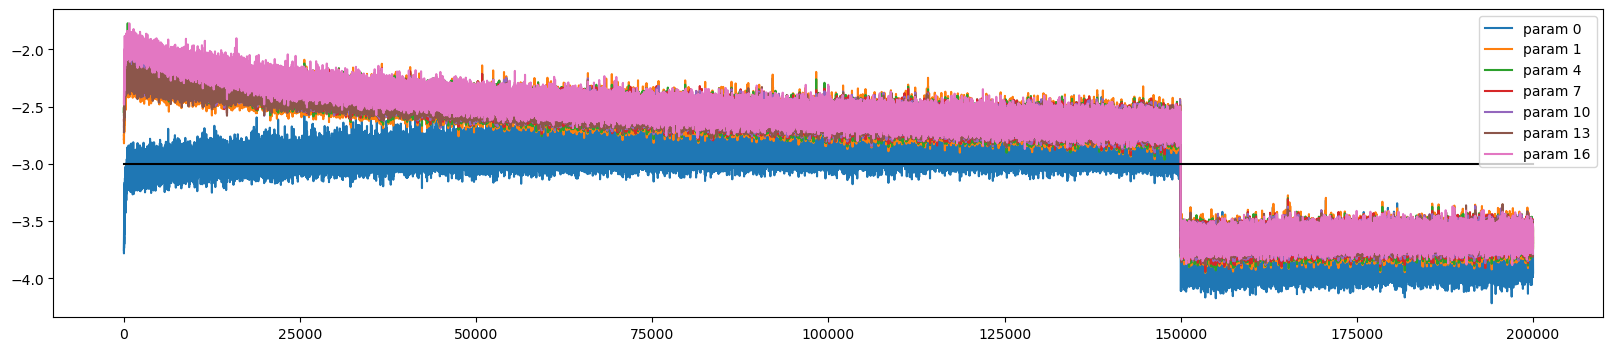

In [147]:
plt.figure(figsize=(20, 4))
legends = []
for i, p in enumerate(parameters):
    if p.ndim == 2:
        plt.plot([ud[j][i] for j in range(len(ud))])
        legends.append(f'param {i}')
plt.plot([0, len(ud)], [-3, -3], 'k')
plt.legend(legends)
plt.show()

In [148]:
@torch.no_grad()
def split_loss(split):
    x, y = {
        'train': (Xtr, Ytr),
        'val':   (Xdev, Ydev),
        'test':  (Xte, Yte),
    }[split]
    emb = C[x]
    x = emb.view(emb.shape[0], -1)
    for layer in layers:
        x = layer(x)
    loss = F.cross_entropy(x, y)
    print(split, loss.item())

for layer in layers:
    layer.training = False
split_loss('train')
split_loss('val')

train 2.000382900238037
val 2.081543445587158


In [149]:
g = torch.Generator().manual_seed(2147483647 + 10)
for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        x = emb.view(emb.shape[0], -1)
        for layer in layers:
            x = layer(x)
        probs = F.softmax(x, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

carmah.
aaryleri.
kimri.
reigh.
skanden.
jazonte.
deliah.
jareei.
nellara.
chaiiv.
kaleigh.
ham.
porn.
quint.
shon.
raiviani.
wavero.
dearyn.
kai.
eveigh.
